## ASSIGNMENT 2-3

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Kaggle: IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions such as:
### 1. Show a breakdown of distance from home by job role and attrition.


In [92]:
breakdown = df.groupby(['JobRole', 'Attrition'])["DistanceFromHome"].mean().reset_index()
breakdown

,JobRole,Attrition,DistanceFromHome
0,Healthcare Representative,No,9.204918
1,Healthcare Representative,Yes,17.666667
2,Human Resources,No,6.600000
3,Human Resources,Yes,13.416667
4,Laboratory Technician,No,9.329949
5,Laboratory Technician,Yes,9.661290
6,Manager,No,7.927835
7,Manager,Yes,10.000000
8,Manufacturing Director,No,9.533333
9,Manufacturing Director,Yes,8.800000


In [95]:
breakdown_1 = df.groupby(['JobRole', 'Attrition'])["DistanceFromHome"].mean().unstack()
breakdown_1


Attrition,No,Yes
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


### Data Visualisation using Seaborn

<AxesSubplot:xlabel='JobRole', ylabel='DistanceFromHome'>

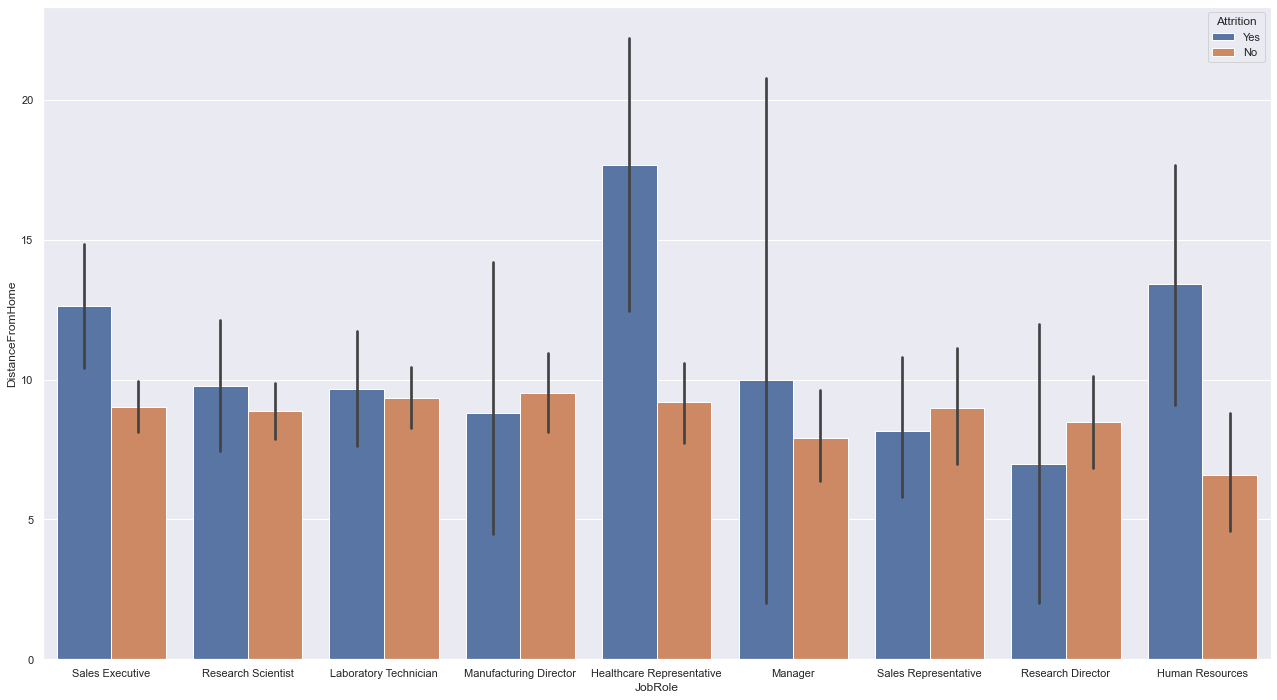

In [114]:
 
plt.figure(figsize = (22,12))
sns.barplot(x = 'JobRole', y = 'DistanceFromHome', data = df, hue = 'Attrition')

<AxesSubplot:xlabel='JobRole', ylabel='DistanceFromHome'>

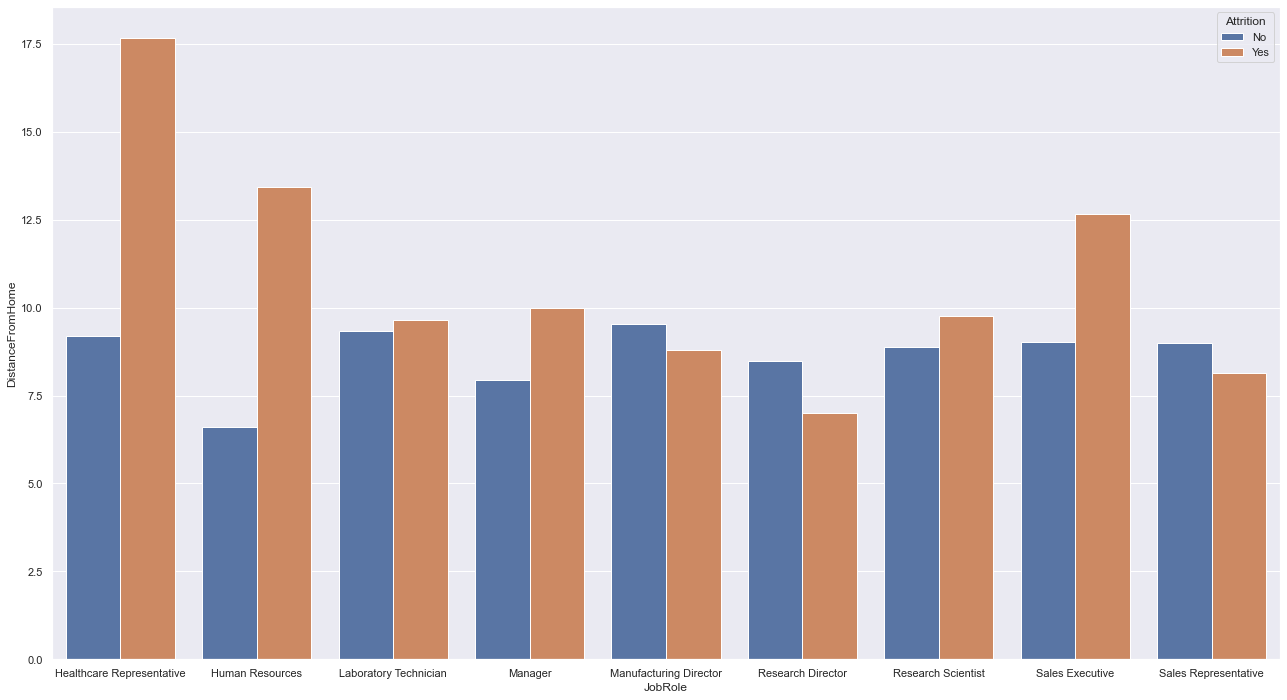

In [93]:
#Alternatively - take not of the hue cahnges
plt.figure(figsize = (22,12))
sns.barplot(x = 'JobRole', y = 'DistanceFromHome', data = breakdown, hue = 'Attrition')

### 2. Compare average monthly income by education and attrition.

In [99]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [110]:
Average = df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()
Average

,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662
5,3,Yes,4770.242424
6,4,No,7087.814706
7,4,Yes,5335.155172
8,5,No,8559.906977
9,5,Yes,5850.200000


In [108]:
df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().unstack()


Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


### Data Visualisation using Seaborn

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

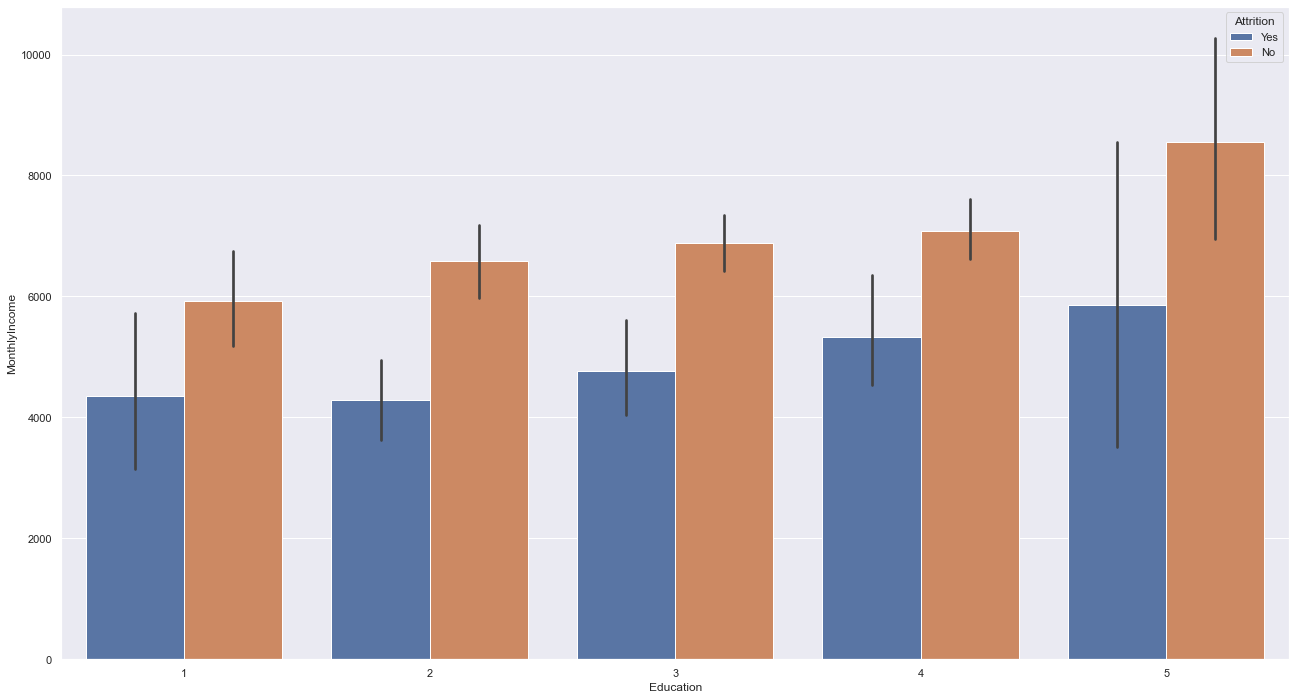

In [118]:

plt.figure(figsize = (22,12))
sns.barplot(x="Education", y="MonthlyIncome", hue="Attrition", data=df )


<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

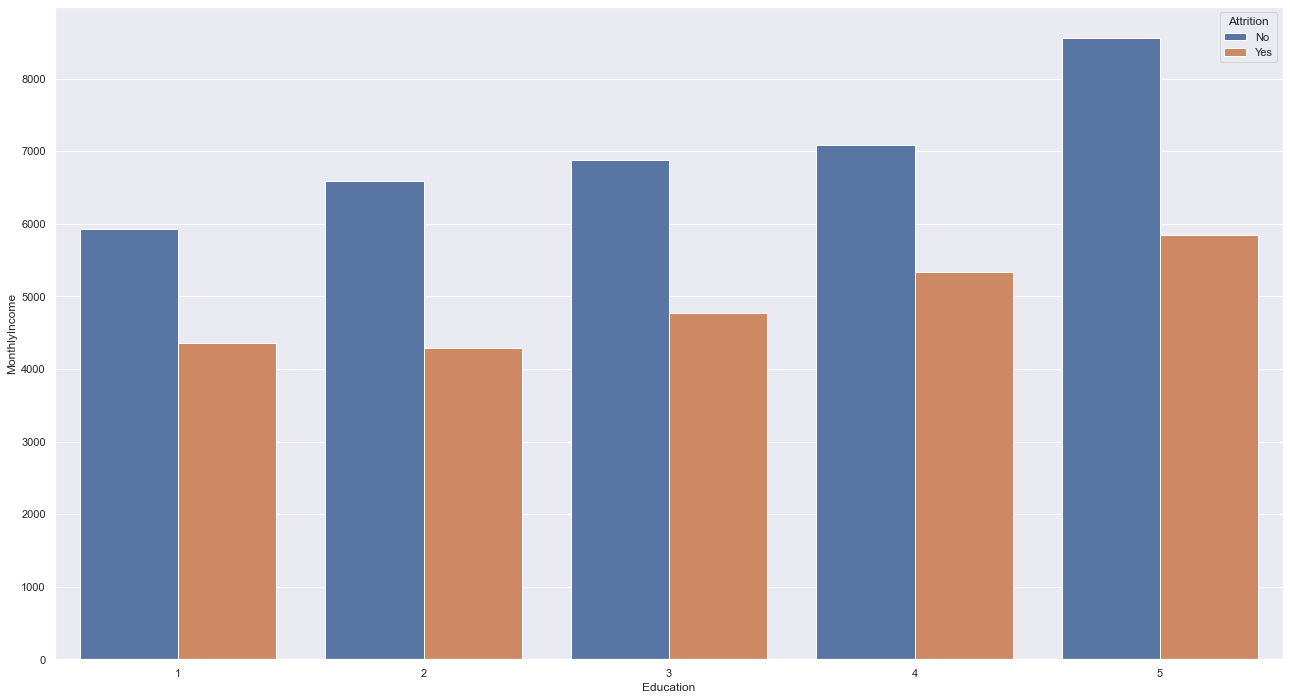

In [117]:
#Alternatively - take not of the hue cahnges
plt.figure(figsize = (22,12))
sns.barplot(x="Education", y="MonthlyIncome", hue="Attrition", data=Average )
